10. Write a program to do the following: You have given a collection of 8 points. P1=[2, 10] P2=[2, 5] P3=[8, 4] P4=[5, 8] P5=[7,5] P6=[6, 4] P7=[1, 2] P8=[4, 9]. Perform the k-mean clustering with initial centroids as m1=P1 =Cluster#1=C1 and m2=P4=cluster#2=C2, m3=P7 =Cluster#3=C3. Answer the following 1] Which cluster does P6 belong to? 2] What is the population of a cluster around m3? 3] What is the updated value of m1, m2, m3?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

print("Loaded the required libraries...")

Loaded the required libraries...


In [2]:
df = pd.DataFrame({"Points": ["P1","P2","P3","P4","P5","P6","P7","P8"],"V1": [2,2,8,5,7,6,1,4],"V2": [10,5,4,8,5,4,2,9]})

df

,Points,V1,V2
0,P1,2,10
1,P2,2,5
2,P3,8,4
3,P4,5,8
4,P5,7,5
5,P6,6,4
6,P7,1,2
7,P8,4,9


In [3]:
df.describe()

,V1,V2
count,8.000000,8.000000
mean,4.375000,5.875000
std,2.559994,2.799872
min,1.000000,2.000000
25%,2.000000,4.000000
50%,4.500000,5.000000
75%,6.250000,8.250000
max,8.000000,10.000000


In [5]:
# define the clusters
k1 = [df['V1'][0],df['V2'][0]]
k2 = [df['V1'][3],df['V2'][3]]
k3 = [df['V1'][6],df['V2'][6]]
print(f"First cluster :  {k1}")
print(f"Second cluster :  {k2}")
print(f"Third cluster :  {k3}")
df.shape[0]


First cluster :  [2, 10]
Second cluster :  [5, 8]
Third cluster :  [1, 2]


8

## Data Visualization

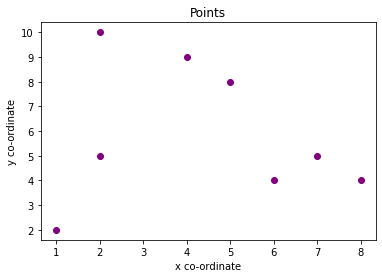

In [6]:
# showing the data graphically

# title
plt.title("Points")
# plot
plt.scatter(df['V1'],df['V2'], color='purple', marker="o")
# x and y labels
plt.xlabel("x co-ordinate")
plt.ylabel("y co-ordinate")
# show the graph
plt.show()

In [7]:
distfromC1 = []
distfromC2 = []

def manhattanDistance(x1, y1, x2, y2):
    x = abs(x2 - x1)
    y = abs(y2 - y1)
    dist = x + y
    return dist

def getTheDistances(k1,k2,k3,DataFrame):
    idx = 0
    list1 = []
    list2 = []
    list3=[]
    while(idx < DataFrame.shape[0]):
        Cluster1Val = manhattanDistance(k1[0],k1[1],DataFrame['V1'][idx],DataFrame['V2'][idx])
        Cluster2Val = manhattanDistance(k2[0],k2[1],DataFrame['V1'][idx],DataFrame['V2'][idx])
        Cluster3Val = manhattanDistance(k3[0],k3[1],DataFrame['V1'][idx],DataFrame['V2'][idx])
        list1.append(Cluster1Val)
        list2.append(Cluster2Val)
        list3.append(Cluster3Val)
        idx = idx + 1
    return list1,list2,list3

distfromC1,distfromC2,distfromC3 = getTheDistances(k1,k2,k3,df)

# print(distfromC1,distfromC2)

def assignTheCluster(distfromC1 = [],distfromC2 = [],dataframe = pd.DataFrame()):
    F1list1 = [] # v1 for the cluster 1
    F1list2 = [] # v2 for the cluster 1
    F2list1 = [] # v1 for the cluster 2
    F2list2 = [] # v2 for the cluster 2
    F3list1 = [] # v1 for the cluster 2
    F3list2 = [] # v2 for the cluster 2
    idx = 0
    while(idx < 8):
        if(distfromC1[idx] < distfromC2[idx]):
            F1list1.append(df['V1'][idx])
            F1list2.append(df['V2'][idx])
        else:
            F2list1.append(df['V1'][idx])
            F2list2.append(df['V2'][idx])
        idx = idx + 1
    clusterFrame1 = pd.DataFrame({'V1': F1list1,'V2': F1list2})
    clusterFrame2 = pd.DataFrame({'V1': F2list1,'V2': F2list2})
    return clusterFrame1,clusterFrame2

k1frame, k2frame = assignTheCluster(distfromC1,distfromC2,df)

# elements belonging to cluster 1
# print(k1)
print(k1frame)
# # elements belonging to cluster 2
# print(k2)
print(k2frame)

def loopAndUpdate(k1frame = pd.DataFrame(),k2frame = pd.DataFrame()):
    noOfElementsInCluster1 = k1frame.shape[0]
    noOfElementsInCluster2 = k2frame.shape[0]
    updatedElementsForCluster1 = 9999
    updatedElementsForCluster2 = 9999
    iteration = 0
    while((noOfElementsInCluster2 != updatedElementsForCluster2) and (noOfElementsInCluster1 != updatedElementsForCluster1)):
        noOfElementsInCluster1 = k1frame.shape[0]
        noOfElementsInCluster2 = k2frame.shape[0]
        f1val1 = k1frame['V1'].mean()
        f1val2 = k1frame['V2'].mean()
        f2val1 = k2frame['V1'].mean()
        f2val2 = k2frame['V2'].mean()
        k1 = [f1val1,f1val2]
        k2 = [f2val1,f2val2]
        print(k1,k2)
        dist1,dist2 = getTheDistances(k1,k2,df)
        k1frame,k2frame = assignTheCluster(dist1,dist2,df)
        print(f"for Iteration {iteration}")
        print(k1frame)
        print(f"\n{k2frame}")
        updatedElementsForCluster1 = k1frame.shape[0]
        updatedElementsForCluster2 = k2frame.shape[0]
        iteration = iteration + 1
    return k1frame,k2frame
    


k1newFrame,k2newFrame = loopAndUpdate(k1frame,k2frame)

   V1  V2
0   2  10
1   2   5
2   1   2
   V1  V2
0   8   4
1   5   8
2   7   5
3   6   4
4   4   9
[1.6666666666666667, 5.666666666666667] [6.0, 6.0]
for Iteration 0
   V1  V2
0   2  10
1   2   5
2   1   2

   V1  V2
0   8   4
1   5   8
2   7   5
3   6   4
4   4   9


In [8]:
k1newFrame

,V1,V2
0,2,10
1,2,5
2,1,2


In [9]:
k2newFrame

,V1,V2
0,8,4
1,5,8
2,7,5
3,6,4
4,4,9


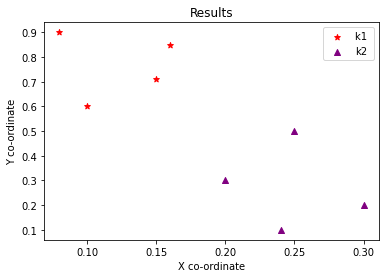

In [ ]:

# title
plt.title("Results")
# plot
plt.scatter(k1newFrame['V1'], k1newFrame["V2"],color='red',marker='*',label="k1 ")
plt.scatter(k2newFrame['V1'], k2newFrame["V2"],color='purple',marker='^',label="k2")
# x and y labels
plt.xlabel("X co-ordinate")
plt.ylabel("Y co-ordinate")
# save
plt.savefig("results.jpg")
# display legend
plt.legend()
# show
plt.show()